# CSCI 5015 PROJECT 
## NEW YORK FIRE DEPARTMENT (FDNY) FIRE INCIDENTS REPORT 

## Written by Sikiru Adewale & Kofi Baryeh (CSCI 5015 Project Group 2)

## **Introduction:** 

In this project, we are analyzing and answering questions on the dataset of  incidents recorded by New York City Fire Department (FDNY).
The New York City Fire Department keeps a log of detailed information on incidents handled by
FDNY units. In this project, we will work with a dataset that contains a record of incidents handled
by FDNY units from 2013-2017. 

## **Aims and Objectives:**
We want to understand the major causes of fire incidents in New York City, and propose reliable information that will help in preventing fire incidents. We want people to be aware of the available safety measure to mitigate fire incidents. 

## **Data Collection and Cleaning:**
We used Python libraries like Pandas, and Numpy to perform data cleaning.
The dataset can be downloaded via the link provided below.
(https://data.cityofnewyork.us/api/views/tm6d-hbzd/rows.csv?accessType=DOWNLOAD).

The link to the description of the data is provided below:
(https://data.cityofnewyork.us/api/views/tm6d-hbzd/files/1434d09c-fbf8-4450-8b42-9fe0c3b85fb3?download=true&filename=OPEN_DATA_FIRE_INCIDENTS_FILE_DESCRIPTION.xls)


In [1]:
%matplotlib inline
import csv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import r2_score
import datetime

In [2]:
#Reading the data into python

FDNY_Incidence = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv', delimiter=',')
number_0f_record = (len(FDNY_Incidence)) 
print(number_0f_record, 'records of fire incidence in New York were recorded from 2013-2017')
type(FDNY_Incidence)
FDNY_Incidence.head()

C:\Users\barye\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2518758 records of fire incidence in New York were recorded from 2013-2017


,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,63476768,2928,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,10453,2 - Bronx,1,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,63476763,1021,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,11203,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,63476761,2745,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,10456,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63476759,1877,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,11208,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Cleaning the Data
#Handling NA in the dataset
FDNY_Incidence = FDNY_Incidence.fillna(0)
FDNY_Incidence.head()
#type(FDNY_Incidence)

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
0,63476768,2928,"746 - Carbon monoxide detector activation, no CO",06/30/2018 11:55:29 PM,07/01/2018 12:00:32 AM,2.0,07/01/2018 12:22:57 AM,11 - First Alarm,1648.0,"42 - HazMat detection, monitoring, sampling, &...",...,10453,2 - Bronx,1,Yes,0.0,0.0,0,0,0,0.0
1,63476763,1021,"300 - Rescue, EMS incident, other",06/30/2018 11:54:44 PM,06/30/2018 11:58:59 PM,1.0,07/01/2018 12:09:29 AM,11 - First Alarm,885.0,"00 - Action taken, other",...,11203,4 - Brooklyn,0,0,0.0,0.0,0,0,0,0.0
2,63476761,2745,"651 - Smoke scare, odor of smoke",06/30/2018 11:54:13 PM,06/30/2018 11:58:29 PM,3.0,07/01/2018 12:07:50 AM,11 - First Alarm,817.0,"00 - Action taken, other",...,10456,2 - Bronx,0,0,0.0,0.0,0,0,0,0.0
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454,2 - Bronx,basement,0,0.0,0.0,0,0,0,0.0
4,63476759,1877,"710 - Malicious, mischievous false call, other",06/30/2018 11:53:33 PM,06/30/2018 11:56:50 PM,1.0,06/30/2018 11:57:11 PM,11 - First Alarm,218.0,"00 - Action taken, other",...,11208,4 - Brooklyn,0,0,0.0,0.0,0,0,0,0.0


In [4]:
#Performing Basic Descriptive Statistics
#Checking the start date, and end date for incident date and time
dc = FDNY_Incidence['INCIDENT_DATE_TIME']. min()
print('The start date of fire incidents recorded in this dataset is ', dc)
gc = FDNY_Incidence['INCIDENT_DATE_TIME']. max()
print('The end date of fire incidents recorded in this dataset is', gc)

The start date of fire incidents recorded in this dataset is  01/01/2013 01:01:16 PM
The end date of fire incidents recorded in this dataset is 12/31/2017 12:59:44 AM


### 1. A Graphical representation of the distribution of incidence that required the presence of fire fighters
#### From the graph it can be seen that Brooklyn had the most incidents that required the precence of fire units followed by Manhattan, Queens, Bronx and the Staten Islans. Coincidentally this rank was the same as the rank of The Best Borough for employment opportunity as well as Best Borough for Cost of Living according to <https://www.extraspace.com/blog/moving/city-guides/best-boroughs-nyc/>

[0 1 2 3 4]
4 - Brooklyn         731297
1 - Manhattan        641825
5 - Queens           509106
2 - Bronx            505899
3 - Staten Island    130631
Name: BOROUGH_DESC, dtype: int64


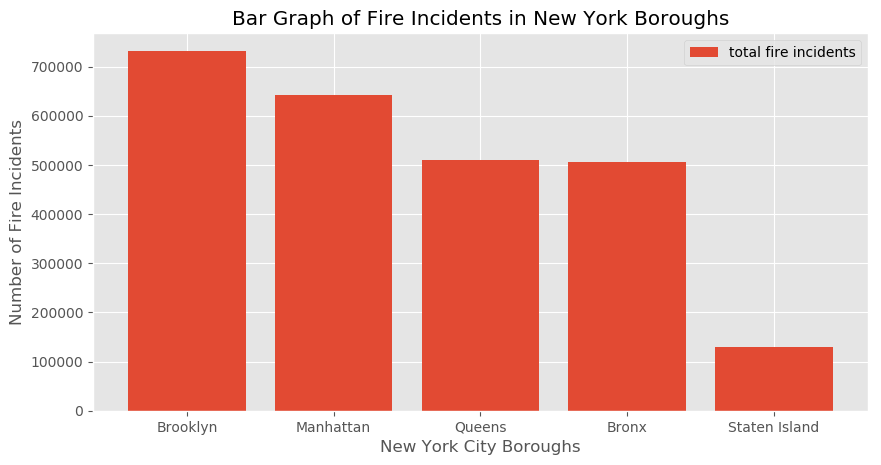

In [5]:
#Performing Descriptive Statistics
#Visualizing the incident types reported
a = FDNY_Incidence['BOROUGH_DESC'].value_counts()
#b = pd.DataFrame(set(FDNY_Incidence['BOROUGH_DESC']))
x = np.arange(5)

print(x)
print(a)

fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=100)

plt.bar(x, a, label='total fire incidents')
plt.xticks(x, ('Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'))
plt.xlabel('New York City Boroughs')
plt.ylabel('Number of Fire Incidents')
plt.title('Bar Graph of Fire Incidents in New York Boroughs')
plt.legend()
plt.show()

### 2. What is the most common incidence type that FDNY firefighters responded to within the state of New York?
#### The most common incidence type that FDNY responded to is  *Rescue and Emergency Medical Service (EMS) incident* with a record of 906466


In [6]:
#Total number of incidents type responded
len(FDNY_Incidence['INCIDENT_TYPE_DESC'].value_counts())
print('The total incident type that the FDNY firefighters responded to is 182')
a = FDNY_Incidence['INCIDENT_TYPE_DESC'].value_counts().iloc[[0]]
print('The most common incidence type that FDNY responded to is', a)

The total incident type that the FDNY firefighters responded to is 182
The most common incidence type that FDNY responded to is 300 - Rescue, EMS incident, other    906466
Name: INCIDENT_TYPE_DESC, dtype: int64


#### Code Description
We counted the number of incident type recorded which is 182. The function value_counts() was used to count each incident type, and iloc was used to select the maximum. The most common incident type is *300-Rescue, EMS incident, other* with a record of 906466

### 3. What is the percentage of fire incidents reported in all the five boroughs of New York City?
#### Brooklyn recorded 29.03%, Manhattan recorded 25.48%, Queens recorded 20.21%, and Staten Island recorded 5.19%


In [7]:
Borough_count = FDNY_Incidence['BOROUGH_DESC'].value_counts()
Borough_ratio = Borough_count/Borough_count.sum()
pd.DataFrame(Borough_ratio*100)

,BOROUGH_DESC
4 - Brooklyn,29.034032
1 - Manhattan,25.481805
5 - Queens,20.212581
2 - Bronx,20.085256
3 - Staten Island,5.186326


#### Code Description
We used the function value_counts() to count all the reported incidents in each New York Borough, and calculated the ratio. The ratio is multiplied by 100, and the percentages are shown above.

### 4. What proportion of FDNY responses in this dataset correspond to the most common type of incident?

#### *0.3599* proportion of FDNY responses in the dataset correspond to the most common type of incident


In [8]:
mc_incident = max(FDNY_Incidence['INCIDENT_TYPE_DESC'].value_counts())
mc_prop = mc_incident/len(FDNY_Incidence)
print(mc_prop, 'proportion of FDNY responses correspond to the most common type of incidence')

0.35988610259500914 proportion of FDNY responses correspond to the most common type of incidence


#### Code Description
The variable name mc_incident is the maximum incidence type in the dataset. mc_prop is the proportion of the common incident type. 

### 5. How many times has the fire hydrant been helpful in putting out fire?

#### Fire hydrant was used *959* times as the first action taken in putting out fire


In [9]:
hydrant = FDNY_Incidence[FDNY_Incidence['ACTION_TAKEN1_DESC'].str.contains('hydrant')]
print('The number of times that fire hydrant has been used in putting out fire is', len(hydrant))

The number of times that fire hydrant has been used in putting out fire is 959


#### Code Description
The function str.contains() was used to search for the string 'hydrant', and the variable name, hydrant was assigned to it. 

### 6. How many times more likely is an incident in Staten Island borough a false call compared to in Manhattan borough?

#### An incident in Staten Island borough is 1.59 times more likely to be false call compare to in Manhattan borough


In [10]:
SI_All = FDNY_Incidence[FDNY_Incidence['BOROUGH_DESC'].str.contains('Island')]
SI_false_call = SI_All[SI_All['INCIDENT_TYPE_DESC'].str.contains('false call')]
SI_false_rate = len(SI_false_call)/len(SI_All)

M_All = FDNY_Incidence[FDNY_Incidence['BOROUGH_DESC'].str.contains('Manhattan')]
M_false_call = M_All[M_All['INCIDENT_TYPE_DESC'].str.contains('false call')]
M_false_rate = len(M_false_call)/len(M_All)

SI_ratio_M = SI_false_rate/M_false_rate
print('Staten Island false call rate is', SI_false_rate)
print('Manhattan false call rate is', M_false_rate)
print('The ratio of Staten Island false call to Manhattan false call is', SI_ratio_M)

Staten Island false call rate is 0.06966952714133705
Manhattan false call rate is 0.04373310481829159
The ratio of Staten Island false call to Manhattan false call is 1.5930615361248586


### Code Description
SI_All variable is all the incidents in Staten Island, SI_false_call is the incidents in Staten Island that contains false call, and the SI_false_rate is the rate of false call in Staten Island.
M_All variable is all the incidents in Manhattan, M_false_call is the incidents in manhattan that contains false call, and the M_false_rate is the rate of false call in Manhattan.


### 7. What is the average time it took FDNY to open and close reported fire incidents in New York City?

#### *Based on this dataset it took FDNY about 1442 seconds to create and close reported incidents in New York City*

In [1]:
avg_time = FDNY_Incidence['TOTAL_INCIDENT_DURATION'].mean()

print('FDNY spent an average of', avg_time, 'seconds to create and close reported incidents in New York city')

NameError: name 'FDNY_Incidence' is not defined

### Code Description
We calculated the average of the total incident duration

### 8. How many civilians’ casualties and firefighters are injured in all the fire incidents?

In [30]:
victim = FDNY_Incidence[FDNY_Incidence['INCIDENT_TYPE_DESC'].str.contains('victim')]
len(victim)

134016

#### Code Discription
We equated the strings within the 'INCIDENT_TYPE_DESC' column to 'Victims', and  used the 'len' function to calculate how many times it occured

### 9. How many fires occured in places with or without Carbon Monooxide (CO) detectors. Some fire reports did not have information on the presence of CO Devices
##### Strangely there were more fires in places with CO detectors than places without it. This cound be attributed to the fact that the presence of the detector made it easier for the fire to be detected resulting in the fire units being called to the scene.

In [14]:
FDNY_Incidence['CO_DETECTOR_PRESENT_DESC'].value_counts()

0      2485756
Yes      26729
No        6273
Name: CO_DETECTOR_PRESENT_DESC, dtype: int64

#### Code Discreption
We used the value_counts() function to return object containing counts of incidents where CO detectors were present as well as incidents where they were not present 

### 10. Plotting the distribution of incidents and number of fire units on the scene

#### The graph below represents a plot of each incidence of a borough where an incident occured against the number of fire units on the scene. It can be seen that Manhattan and Brooklyn had incidents that required the precence of the most fire units according to the data

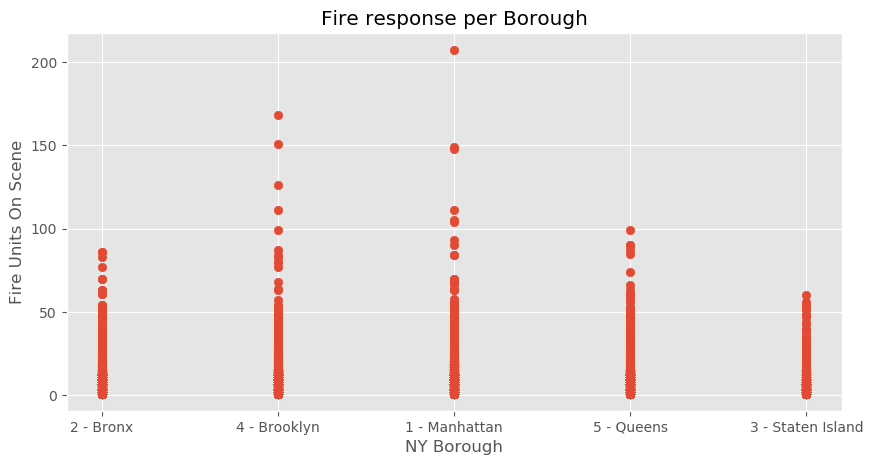

In [15]:
df = pd.read_csv('Incidents_Responded_to_by_Fire_Companies.csv')
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=100)
my_scatter_plot = ax.scatter(
df['BOROUGH_DESC'], # x values
df['UNITS_ONSCENE'] # y values
)
ax.set_xlabel('NY Borough')
ax.set_ylabel('Fire Units On Scene')
ax.set_title('Fire response per Borough')

plt.show()

### 11. Tabular representation of the Number of incidents where fire was succesfully put out.
#### From the table it can be seen that fire was successfully put out in approximately 161207 out of a total of 2518758 incidents

In [16]:
df.loc[df['ACTION_TAKEN1_DESC'] == '11 - Extinguishment by fire service personnel']

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
3,63476762,2135,"117 - Commercial Compactor fire, confined to r...",06/30/2018 11:54:08 PM,06/30/2018 11:58:53 PM,5.0,07/01/2018 12:19:16 AM,11 - First Alarm,1508.0,11 - Extinguishment by fire service personnel,...,10454,2 - Bronx,basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,63476745,5110,131 - Passenger vehicle fire,06/30/2018 11:49:05 PM,06/30/2018 11:55:33 PM,2.0,07/01/2018 12:18:03 AM,11 - First Alarm,1738.0,11 - Extinguishment by fire service personnel,...,11379,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,63476634,470,"151 - Outside rubbish, trash or waste fire",06/30/2018 11:27:21 PM,06/30/2018 11:30:01 PM,6.0,06/30/2018 11:55:05 PM,11 - First Alarm,1664.0,11 - Extinguishment by fire service personnel,...,10009,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,63476455,430,"113 - Cooking fire, confined to container",06/30/2018 10:43:34 PM,06/30/2018 10:48:24 PM,2.0,06/30/2018 10:54:24 PM,11 - First Alarm,650.0,11 - Extinguishment by fire service personnel,...,11201,4 - Brooklyn,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,63476297,1646,"151 - Outside rubbish, trash or waste fire",06/30/2018 10:11:40 PM,06/30/2018 10:17:14 PM,1.0,06/30/2018 10:28:02 PM,11 - First Alarm,982.0,11 - Extinguishment by fire service personnel,...,11233,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,63476282,1341,"113 - Cooking fire, confined to container",06/30/2018 10:10:23 PM,06/30/2018 10:15:10 PM,6.0,06/30/2018 10:26:42 PM,11 - First Alarm,979.0,11 - Extinguishment by fire service personnel,...,10026,1 - Manhattan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,63476270,1271,"117 - Commercial Compactor fire, confined to r...",06/30/2018 10:08:39 PM,06/30/2018 10:11:36 PM,5.0,06/30/2018 10:28:52 PM,11 - First Alarm,1213.0,11 - Extinguishment by fire service personnel,...,10025,1 - Manhattan,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,63476021,2411,"151 - Outside rubbish, trash or waste fire",06/30/2018 09:23:22 PM,06/30/2018 09:27:59 PM,1.0,06/30/2018 09:40:12 PM,11 - First Alarm,1010.0,11 - Extinguishment by fire service personnel,...,10474,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,63476013,1266,"113 - Cooking fire, confined to container",06/30/2018 09:21:52 PM,06/30/2018 09:25:16 PM,5.0,06/30/2018 09:41:12 PM,11 - First Alarm,1160.0,11 - Extinguishment by fire service personnel,...,10025,1 - Manhattan,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,63475882,1776,"113 - Cooking fire, confined to container",06/30/2018 09:00:49 PM,06/30/2018 09:05:11 PM,5.0,06/30/2018 09:20:23 PM,11 - First Alarm,1174.0,11 - Extinguishment by fire service personnel,...,10040,1 - Manhattan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Code Description
The loc function was used to extract all the incidents where the data indicated the fire was successfuly 'Extinguishment by fire service personnel'

#### We counted the number of incident type recorded which is 182. The function value_counts() was used to count each incident type, and iloc was used to select the maximum. The most common incident type is *300-Rescue, EMS incident, other* with a record of 906466

### 12. What Actions did the fire units that arrived on the scene of the incidents take to solve the problem.

##### (a.) First Action taken

In [42]:
FDNY_Incidence['ACTION_TAKEN1_DESC'].value_counts().iloc[[0, 1, 2]]

00 - Action taken, other    1258781
86 - Investigate             297766
64 - Shut down system        226611
Name: ACTION_TAKEN1_DESC, dtype: int64

##### (b.) Second Action taken

In [40]:
FDNY_Incidence['ACTION_TAKEN2_DESC'].value_counts().iloc[[0, 1, 2]]

0                        1983186
64 - Shut down system     122338
51 - Ventilate            119399
Name: ACTION_TAKEN2_DESC, dtype: int64

##### (c.) Third Action taken

In [41]:
FDNY_Incidence['ACTION_TAKEN3_DESC'].value_counts().iloc[[0, 1, 2]]

0                              2273503
82 - Notify other agencies.     116149
86 - Investigate                 44710
Name: ACTION_TAKEN3_DESC, dtype: int64

##### The first action that Fire Units took when they arrived on the scene acording to the data was "Action taken, other". No information is given on what this action entails. The next on the list was to investigate the scene of the incident to find out more information that would help them solve the problem. The second action taken was to shut down the system. From the result it can be seen that most of the fields (1983186) were undefined (empty). The third action that fire fighters take according to the data is to 'Notifying Other Agencies'. Just as in the case of the second action, most of the fields (2273503) were undefined (empty). In summary when fire fighter within the state of New York arrive on the scene of an incident, the first thing they normally to is to investigate the scene, then they shut down the system where applicable and finally notify other agencies.

### Conclusion of our Findings


In [1]:
conda info opencv


opencv 3.3.1 py35h20b85fd_1
---------------------------
file name   : opencv-3.3.1-py35h20b85fd_1.tar.bz2
name        : opencv
version     : 3.3.1
build string: py35h20b85fd_1
build number: 1
channel     : https://repo.anaconda.com/pkgs/main/win-64
size        : 96.6 MB
arch        : None
constrains  : ()
license     : BSD 3-clause
license_family: BSD
md5         : c24c567c2e7e9dda29266eb5bb66c61f
platform    : None
subdir      : win-64
timestamp   : 1512685808746
url         : https://repo.anaconda.com/pkgs/main/win-64/opencv-3.3.1-py35h20b85fd_1.tar.bz2
dependencies:
    jpeg >=9b,<10a
    libpng >=1.6.32,<1.7.0a0
    libtiff >=4.0.9,<5.0a0
    numpy >=1.11.3,<2.0a0
    python >=3.5,<3.6.0a0
    vc 14.*
    zlib >=1.2.11,<1.3.0a0

opencv 3.3.1 py36h20b85fd_1
---------------------------
file name   : opencv-3.3.1-py36h20b85fd_1.tar.bz2
name        : opencv
version     : 3.3.1
build string: py36h20b85fd_1
build number: 1
channel     : https://repo.anaconda.com/pkgs/main/win-64
size   

          Use 'conda search package_name --info'.
